# Assignment 9: GBDT

#### Response Coding: Example

<img src='http://i.imgur.com/TufZptV.jpg' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
from nltk.corpus import stopwords
import pickle
from tqdm import tqdm
import os

In [2]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [3]:
train_path="/content/drive/My Drive/train_data.csv"
resource_path="/content/drive/My Drive/resources.csv"

In [4]:
project_data = pd.read_csv(train_path,nrows=35000)
resource_data=pd.read_csv(resource_path)

In [5]:
import pickle
#please use below code to load glove vectors 
with open(r'/content/drive/MyDrive/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_vectors =  set(model.keys())

In [6]:
Pre_data=pd.read_csv("/content/Donors_data.csv")

In [7]:
Pre_data.head(2)

,Unnamed: 0,Unnamed: 0.1,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,...,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,essay,preprocessed_essays,preprocessed_titles,neg,pos,neu,compound
0,0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,mrs,in,2016-12-05 13:43:57,grades_prek_2,literacy_language,esl_literacy,...,My students need opportunities to practice beg...,0,0,my students are english learners that are work...,students english learners working english seco...,educational support english learners home,0.008,0.081,0.911,0.9611
1,1,140945,p258326,897464ce9ddc600bced1151f324dd63a,mr,fl,2016-10-25 09:22:10,grades_6_8,history_civics_health_sports,civics_government_teamsports,...,My students need a projector to help with view...,7,1,our students arrive to our school eager to lea...,students arrive school eager learn polite gene...,wanted projector hungry learners,0.037,0.118,0.845,0.9447


<ol>
    <li><strong>Apply GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)+sentiment Score of eassay(check the bellow example, include all 4 values as 4 features)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        
    </li>
    <li> Here in response encoding you need to apply the <strong>laplase smoothing</strong> value for test set. Laplase smoothing means, If test point is present in test but not in train then you need to apply default 0.5 as probability value for that data point (Refer the Response Encoding Image from above cell) </li>
    <li>Please use atleast <strong> 35k </strong> data points </li></ul>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
        Make sure that you are using predict_proba method to calculate AUC curves, because AUC is calcualted on class probabilities and not on class labels.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
            </ul>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

# Few Notes

1. Use atleast 35k data points
2. Use classifier.Predict_proba() method instead of predict() method while calculating roc_auc scores
3. Be sure that you are using laplase smoothing in response encoding function. Laplase smoothing means applying the default (0.5) value to test data if the test data is not present in the train set


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

sample_sentence_1='I am happy.'
ss_1 = sid.polarity_scores(sample_sentence_1)
print('sentiment score for sentence 1',ss_1)

sample_sentence_2='I am sad.'
ss_2 = sid.polarity_scores(sample_sentence_2)
print('sentiment score for sentence 2',ss_2)

sample_sentence_3='I am going to New Delhi tommorow.'
ss_3 = sid.polarity_scores(sample_sentence_3)
print('sentiment score for sentence 3',ss_3)


LookupError: ignored

<h1>1. GBDT (xgboost/lightgbm) </h1>

## 1.1 Loading Data

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [8]:
y = Pre_data['project_is_approved'].values
X = Pre_data.drop(['project_is_approved'], axis=1)
X.head(1)

,Unnamed: 0,Unnamed: 0.1,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,essay,preprocessed_essays,preprocessed_titles,neg,pos,neu,compound
0,0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,mrs,in,2016-12-05 13:43:57,grades_prek_2,literacy_language,esl_literacy,educational support for english learners at home,My students need opportunities to practice beg...,0,my students are english learners that are work...,students english learners working english seco...,educational support english learners home,0.008,0.081,0.911,0.9611


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
print("Split ratio")
print('-'*50)
print('Train dataset:',len(X_train)/len(X)*100,'%\n','size:',len(X_train))
print('Test dataset:',len(X_test)/len(X)*100,'%\n','size:',len(X_test))

Split ratio
--------------------------------------------------
Train dataset: 67.0 %
 size: 23450
Test dataset: 33.0 %
 size: 11550


<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [10]:
#Converting essay in to TFIDF representation using count vectorizer.
vectorizer_tfidf_essay = TfidfVectorizer(min_df=10)
vectorizer_tfidf_essay.fit(X_train['preprocessed_essays'])      #Fitting has to be on Train data
 
X_train_essay_tfidf = vectorizer_tfidf_essay.transform(X_train['preprocessed_essays'].values)

X_test_essay_tfidf = vectorizer_tfidf_essay.transform(X_test['preprocessed_essays'].values)

print("Shape of train data matrix after one hot encoding ",X_train_essay_tfidf.shape)

print("Shape of test data matrix after one hot encoding ",X_test_essay_tfidf.shape)

Shape of train data matrix after one hot encoding  (23450, 8934)
Shape of test data matrix after one hot encoding  (11550, 8934)


In [11]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [12]:
# converting essay to tfidf_w2v
# compute average word2vec for each review.
def tfidf_w2v(words):
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(words): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_vectors) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)

    print(len(tfidf_w2v_vectors))
    print(len(tfidf_w2v_vectors[0]))
    return tfidf_w2v_vectors

In [13]:
train_tfidf_w2v=tfidf_w2v(X_train['preprocessed_essays'])
test_tfidf_w2v=tfidf_w2v(X_test['preprocessed_essays'])

100%|██████████| 23450/23450 [00:39<00:00, 590.89it/s]


23450
300


100%|██████████| 11550/11550 [00:19<00:00, 595.78it/s]

11550
300


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [14]:
categorical_cols = ['school_state','teacher_prefix','project_grade_category','project_subject_categories','project_subject_subcategories',]

In [15]:
#https://gist.github.com/sukanta-27/1fb75d974a083883a0bd27af00032718
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: Categorical Features
# df: ['train_df', 'test_df', 'cv_df']
# algorithm
# ----------
# Consider all unique values and the number of occurances of given feature in train dataframe
# build a vector (1*2) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+20*alpha)
# feat_dict is like a look up table, for every categorical data it store a (1*2) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'feat_dict' look up table to 'res_fea'
# if it is not there is train:
# we add [1/2, 1/2] to 'res_fea'
# return 'res_fea'
# ----------------------

# get_fea_dict: Get categorical data Feature Dict
def get_fea_dict(alpha, feature, train_df, train_df_y):
    # value_count: it contains a dict like
    value_count = train_df[feature].value_counts()
    
    # feat_dict : Categorical feature Dict, which contains the probability array for each categorical variable
    feat_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of the particular 
        # categorical feature belongs to particular class
        # vec is 2 diamensional vector
        vec = []
        for k in range(0, 2):
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = train_df.loc[(train_df_y==k) & (train_df[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 20*alpha))

        # we are adding the categorical feature to the dict as key and vec as value
        feat_dict[i]=vec
    return feat_dict

# Get Response coded feature
def get_response_feature(alpha, feature, train_df, train_df_y):

    feat_dict = get_fea_dict(alpha, feature, train_df, train_df_y)
    # value_count is similar in get_fea_dict
    value_count = train_df[feature].value_counts()
    
    # res_fea: response coded feature, it will contain the response coded feature for each feature value in the data
    res_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to res_fea
    # if not we will add [1/2, 1/2] to res_fea
    for index, row in train_df.iterrows():
        if row[feature] in dict(value_count).keys():
            res_fea.append(feat_dict[row[feature]])
        else:
            res_fea.append([1/2, 1/2])
    return res_fea

In [16]:
def ResponseEncoder(categorical_cols, x_df, y_df):

  """
    This function takes Categorical column names and X and Y dataframe.

    Returns the response coded dataframe
  """
  print("Encoding Train dataset")
  print("Shape of the train dataset before encoding: ", X_train.shape)
  for i in (categorical_cols):
    temp_response_coded_feature = np.array(get_response_feature(alpha=1, feature=i, train_df=x_df, train_df_y=y_df))
    df_response = pd.DataFrame(temp_response_coded_feature, columns=[i+"_0", i+"_1"])
    x_df = pd.concat([x_df, df_response], axis=1)
  
  # Remove the categorical features as the response coded features are added
  x_df = x_df.drop(categorical_cols, axis=1)
  return x_df

In [17]:
# Reset index so that pd.concat works properly in ResponseEncoder function
X_train_RES = X_train.reset_index().drop("index",axis=1)
X_test_RES = X_test.reset_index().drop("index",axis=1)


In [18]:
X_train_RES = ResponseEncoder(categorical_cols, X_train_RES, y_train)
print("Shape of the train dataset after encoding: ", X_train.shape)

X_test_RES = ResponseEncoder(categorical_cols, X_test_RES, y_test)
print("Shape of the test dataset after encoding: ", X_test.shape)

Encoding Train dataset
Shape of the train dataset before encoding:  (23450, 20)
Shape of the train dataset after encoding:  (23450, 20)
Encoding Train dataset
Shape of the train dataset before encoding:  (23450, 20)
Shape of the test dataset after encoding:  (11550, 20)


In [19]:
#Normalizing price
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [20]:
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')

In [21]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))
X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))
print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)

print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(23450, 1) (23450,)
(11550, 1) (11550,)


In [22]:
#Normalizing teacher_number_of_previously_posted_projects
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_post_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_test_post_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_post_norm.shape, y_train.shape)

print(X_test_post_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(23450, 1) (23450,)
(11550, 1) (11550,)


In [23]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['neg'].values.reshape(-1,1))

X_train_neg_norm = normalizer.transform(X_train['neg'].values.reshape(-1,1))

X_test_neg_norm = normalizer.transform(X_test['neg'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_neg_norm.shape, y_train.shape)

print(X_test_neg_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(23450, 1) (23450,)
(11550, 1) (11550,)


In [24]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['pos'].values.reshape(-1,1))

X_train_pos_norm = normalizer.transform(X_train['pos'].values.reshape(-1,1))

X_test_pos_norm = normalizer.transform(X_test['pos'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_pos_norm.shape, y_train.shape)

print(X_test_pos_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(23450, 1) (23450,)
(11550, 1) (11550,)


In [25]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['compound'].values.reshape(-1,1))

X_train_com_norm = normalizer.transform(X_train['compound'].values.reshape(-1,1))

X_test_com_norm = normalizer.transform(X_test['compound'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_com_norm.shape, y_train.shape)

print(X_test_com_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(23450, 1) (23450,)
(11550, 1) (11550,)


In [26]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['neu'].values.reshape(-1,1))

X_train_neu_norm = normalizer.transform(X_train['neu'].values.reshape(-1,1))

X_test_neu_norm = normalizer.transform(X_test['neu'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_neu_norm.shape, y_train.shape)

print(X_test_neu_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(23450, 1) (23450,)
(11550, 1) (11550,)


SET-1

In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr1 = hstack((X_train_essay_tfidf,X_train_RES[['school_state_0']],X_train_RES[['school_state_1']],X_train_RES[['teacher_prefix_0']],X_train_RES[['teacher_prefix_1']],X_train_RES[['project_grade_category_0']],X_train_RES[['project_grade_category_1']],X_train_RES[['project_subject_categories_0']],X_train_RES[['project_subject_categories_1']],X_train_RES[['project_subject_subcategories_0']],X_train_RES[['project_subject_subcategories_1']],X_train_price_norm,X_train_post_norm,X_train_neg_norm,X_train_neu_norm,X_train_pos_norm,X_train_com_norm)).tocsr()

X_te1 = hstack((X_test_essay_tfidf,X_test_RES[['school_state_0']],X_test_RES[['school_state_1']],X_test_RES[['teacher_prefix_0']],X_test_RES[['teacher_prefix_1']],X_test_RES[['project_grade_category_0']],X_test_RES[['project_grade_category_1']],X_test_RES[['project_subject_categories_0']],X_test_RES[['project_subject_categories_1']],X_test_RES[['project_subject_subcategories_0']],X_test_RES[['project_subject_subcategories_1']],X_test_price_norm,X_test_post_norm,X_test_neg_norm,X_test_neu_norm,X_test_pos_norm,X_test_com_norm)).tocsr()

print("Final Data matrix")
print(X_tr1.shape, y_train.shape)

print(X_te1.shape, y_test.shape)
print("="*100)

Final Data matrix
(23450, 8979) (23450,)
(11550, 8979) (11550,)


In [ ]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

<h2>1.5 Appling Models on different kind of featurization as mentioned in the instructions</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score

LGBM = lgb.LGBMClassifier()
params = {'max_depth': [1, 5, 10], 'min_child_samples': [5, 10, 20]}
clf = GridSearchCV(LGBM, params, cv= 3, scoring='roc_auc',verbose=1,return_train_score=True)
clf.fit(X_tr1, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']
bestMaxDepth_1=clf.best_params_['max_depth']
bestMinSampleSplit_1=clf.best_params_['min_child_samples']
bestScore_1=clf.best_score_
print("BEST MAX DEPTH: ",clf.best_params_['max_depth']," BEST SCORE: ",clf.best_score_,"BEST MIN CHILD SAMPLES: ",clf.best_params_['min_child_samples'])

Fitting 3 folds for each of 9 candidates, totalling 27 fits
BEST MAX DEPTH:  5  BEST SCORE:  0.6802563895789525 BEST MIN CHILD SAMPLES:  20


In [ ]:
print(clf.best_params_)

{'max_depth': 5, 'min_child_samples': 20}


In [ ]:
# Best tune parameters
best_tune_parameters=[{'max_depth':[5], 'min_child_sample':[20] } ]

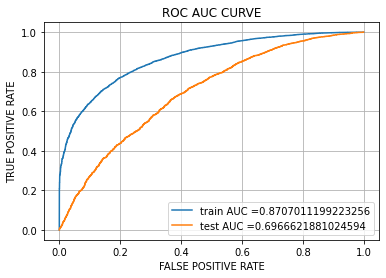

In [ ]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

model=lgb.LGBMClassifier(class_weight = 'balanced',max_depth=5,min_child_sample=20)
model.fit(X_tr1, y_train)
# for visulation
clf.fit(X_tr1, y_train)
#https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function
y_train_pred1 = clf.predict_proba(X_tr1) [:,1]
y_test_pred1 = clf.predict_proba(X_te1) [:,1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred1)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred1)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("ROC AUC CURVE")
plt.grid()
plt.show()

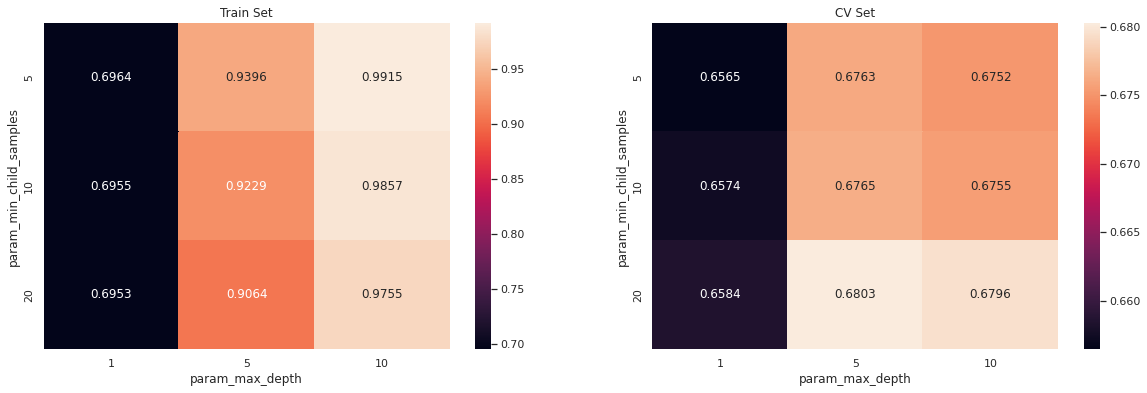

In [ ]:
import seaborn as sns; sns.set()
from sklearn.model_selection import GridSearchCV
max_scores1 = pd.DataFrame(clf.cv_results_).groupby(['param_min_child_samples', 'param_max_depth']).max().unstack()[['mean_test_score','mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [ ]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    global predictions1
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1=predictions
    return predictions

In [ ]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred1, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred1, best_t)))

the maximum value of tpr*(1-fpr) 0.6175737813184561 for threshold 0.499
Train confusion matrix
[[ 2917   694]
 [ 4672 15167]]
Test confusion matrix
[[1062  716]
 [3026 6746]]


the maximum value of tpr*(1-fpr) 0.6175737813184561 for threshold 0.499


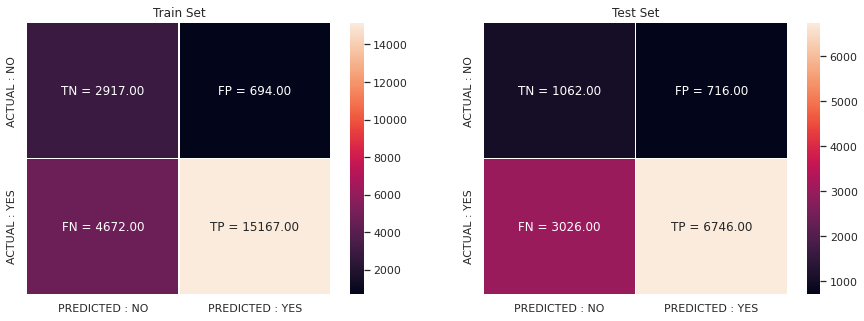

In [ ]:
print("="*100)
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
con_m_train=confusion_matrix(y_train, predict_with_best_t(y_train_pred1, best_t))
con_m_test=confusion_matrix(y_test, predict_with_best_t(y_test_pred1, best_t))
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),con_m_test.flatten())])).reshape(2,2)
sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

SET-2

In [54]:
X1=csr_matrix(train_tfidf_w2v)[0:20000,:]
X2=csr_matrix(test_tfidf_w2v)[0:12000,:]

In [55]:
X_ss_train_0=csr_matrix(X_train_RES[['school_state_0']])[0:20000,:]
X_ss_train_1=csr_matrix(X_train_RES[['school_state_1']])[0:20000,:]
X_tp_train_0=csr_matrix(X_train_RES[['teacher_prefix_0']])[0:20000,:]
X_tp_train_1=csr_matrix(X_train_RES[['teacher_prefix_1']])[0:20000,:]
X_pg_train_0=csr_matrix(X_train_RES[['project_grade_category_0']])[0:20000,:]
X_pg_train_1=csr_matrix(X_train_RES[['project_grade_category_1']])[0:20000,:]
X_ps_train_0=csr_matrix(X_train_RES[['project_subject_categories_0']])[0:20000,:]
X_ps_train_1=csr_matrix(X_train_RES[['project_subject_categories_1']])[0:20000,:]
X_pss_train_0=csr_matrix(X_train_RES[['project_subject_subcategories_0']])[0:20000,:]
X_pss_train_1=csr_matrix(X_train_RES[['project_subject_subcategories_1']])[0:20000,:]
X_price_train=csr_matrix(X_train_price_norm)[0:20000,:]
X_post_train=csr_matrix(X_train_post_norm)[0:20000,:]
X_neg_train=csr_matrix(X_train_neg_norm)[0:20000,:]
X_neu_train=csr_matrix(X_train_neu_norm)[0:20000,:]
X_pos_train=csr_matrix(X_train_pos_norm)[0:20000,:]
X_com_train=csr_matrix(X_train_com_norm)[0:20000,:]

In [58]:
X_ss_test_0=csr_matrix(X_test_RES[['school_state_0']])[0:20000,:]
X_ss_test_1=csr_matrix(X_test_RES[['school_state_1']])[0:20000,:]
X_tp_test_0=csr_matrix(X_test_RES[['teacher_prefix_0']])[0:20000,:]
X_tp_test_1=csr_matrix(X_test_RES[['teacher_prefix_1']])[0:20000,:]
X_pg_test_0=csr_matrix(X_test_RES[['project_grade_category_0']])[0:20000,:]
X_pg_test_1=csr_matrix(X_test_RES[['project_grade_category_1']])[0:20000,:]
X_ps_test_0=csr_matrix(X_test_RES[['project_subject_categories_0']])[0:20000,:]
X_ps_test_1=csr_matrix(X_test_RES[['project_subject_categories_1']])[0:20000,:]
X_pss_test_0=csr_matrix(X_test_RES[['project_subject_subcategories_0']])[0:20000,:]
X_pss_test_1=csr_matrix(X_test_RES[['project_subject_subcategories_1']])[0:20000,:]
X_price_test=csr_matrix(X_test_price_norm)[0:20000,:]
X_post_test=csr_matrix(X_test_post_norm)[0:20000,:]
X_neg_test=csr_matrix(X_test_neg_norm)[0:20000,:]
X_neu_test=csr_matrix(X_test_neu_norm)[0:20000,:]
X_pos_test=csr_matrix(X_test_pos_norm)[0:20000,:]
X_com_test=csr_matrix(X_test_com_norm)[0:20000,:]

In [59]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr2 = hstack((X1, X_ss_train_0,X_ss_train_1,X_tp_train_0,X_tp_train_1,X_pg_train_0,X_pg_train_1,X_ps_train_0,X_ps_train_1,X_pss_train_0,X_pss_train_1,X_price_train,X_post_train,X_neg_train,X_neu_train,X_pos_train,X_com_train)).tocsr()

X_te2 = hstack((X2, X_ss_test_0,X_ss_test_1,X_tp_test_0,X_tp_test_1,X_pg_test_0,X_pg_test_1,X_ps_test_0,X_ps_test_1,X_pss_test_0,X_pss_test_1,X_price_test,X_post_test,X_neg_test,X_neu_test,X_pos_test,X_com_test)).tocsr()

print("Final Data matrix")
print(X_tr2.shape, y_train.shape)

print(X_te2.shape, y_test.shape)
print("="*100)

Final Data matrix
(20000, 316) (23450,)
(11550, 316) (11550,)


In [64]:
y_train2=y_train[0:20000]

In [65]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score

LGBM = lgb.LGBMClassifier()
params = {'max_depth': [1, 5, 10], 'min_child_samples': [5, 10, 20]}
clf = GridSearchCV(LGBM, params, cv= 3, scoring='roc_auc',verbose=1,return_train_score=True)
clf.fit(X_tr2, y_train2)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']
bestMaxDepth_1=clf.best_params_['max_depth']
bestMinSampleSplit_1=clf.best_params_['min_child_samples']
bestScore_1=clf.best_score_
print("BEST MAX DEPTH: ",clf.best_params_['max_depth']," BEST SCORE: ",clf.best_score_,"BEST MIN CHILD SAMPLES: ",clf.best_params_['min_child_samples'])

Fitting 3 folds for each of 9 candidates, totalling 27 fits
BEST MAX DEPTH:  5  BEST SCORE:  0.6781193544034112 BEST MIN CHILD SAMPLES:  5


In [66]:
print(clf.best_params_)

{'max_depth': 5, 'min_child_samples': 5}


In [67]:
# Best tune parameters
best_tune_parameters=[{'max_depth':[5], 'min_child_sample':[5] } ]

Fitting 3 folds for each of 9 candidates, totalling 27 fits


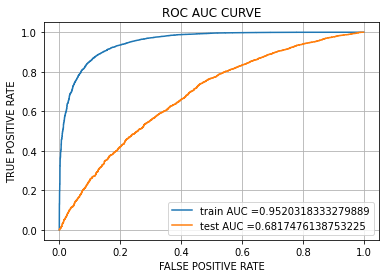

In [71]:
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

model=lgb.LGBMClassifier(class_weight = 'balanced',max_depth=5,min_child_sample=5)
model.fit(X_tr2, y_train2)
# for visulation
clf.fit(X_tr2, y_train2)
#https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function
y_train_pred2 = clf.predict_proba(X_tr2) [:,1]
y_test_pred2 = clf.predict_proba(X_te2) [:,1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train2, y_train_pred2)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred2)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("ROC AUC CURVE")
plt.grid()
plt.show()

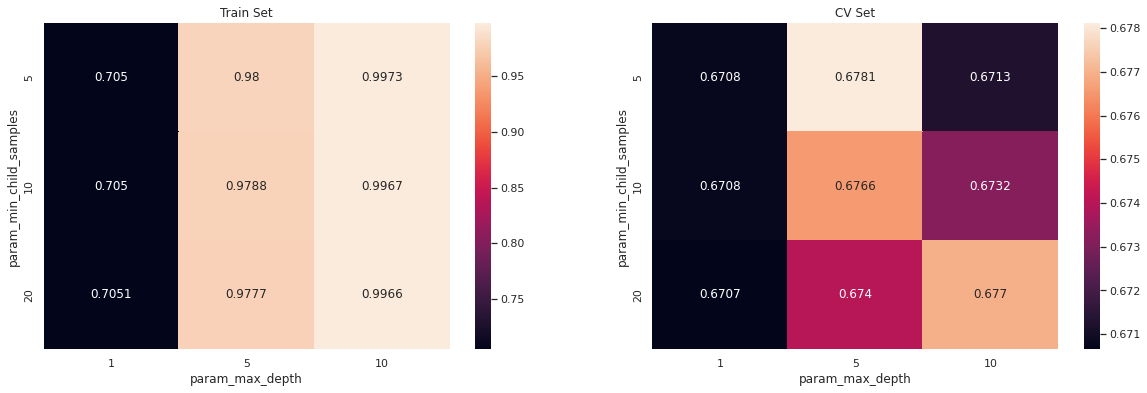

In [72]:
import seaborn as sns; sns.set()
from sklearn.model_selection import GridSearchCV
max_scores1 = pd.DataFrame(clf.cv_results_).groupby(['param_min_child_samples', 'param_max_depth']).max().unstack()[['mean_test_score','mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [73]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    global predictions1
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1=predictions
    return predictions

In [75]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train2, predict_with_best_t(y_train_pred2, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred2, best_t)))

the maximum value of tpr*(1-fpr) 0.7742214469524957 for threshold 0.802
Train confusion matrix
[[ 2675   389]
 [ 1917 15019]]
Test confusion matrix
[[ 854  924]
 [2140 7632]]


the maximum value of tpr*(1-fpr) 0.7742214469524957 for threshold 0.802


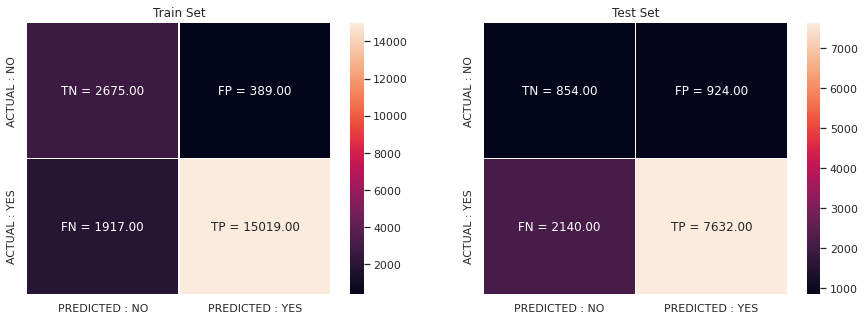

In [76]:
print("="*100)
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
con_m_train=confusion_matrix(y_train2, predict_with_best_t(y_train_pred2, best_t))
con_m_test=confusion_matrix(y_test, predict_with_best_t(y_test_pred2, best_t))
key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize=(15,5))
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), con_m_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(),con_m_test.flatten())])).reshape(2,2)
sns.heatmap(con_m_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(con_m_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'],yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.show()

Summary:

1.When we compare both models with AUC TFIDF performing slightly better compared to TFIDFW2V model and model-2 slightly overfitting because train and test scores are far away.

2.We compare both models with confusion matrix model-2 has False positives more than model-1 so it has problem with predicting negative label and model-1 has more False negatives comapared to model-2 so model-1 has problem with predicting positive class.

In [77]:
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer","MAX_DEPTH", "MIN_CHILD_Samples", "Test AUC"]

x.add_row(["TFIDF","5","20", 0.696])
x.add_row(["TFIDF_W2V", "5", "5",0.681])

print(x)

+------------+-----------+-------------------+----------+
| Vectorizer | MAX_DEPTH | MIN_CHILD_Samples | Test AUC |
+------------+-----------+-------------------+----------+
|   TFIDF    |     5     |         20        |  0.696   |
| TFIDF_W2V  |     5     |         5         |  0.681   |
+------------+-----------+-------------------+----------+
